In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [2]:
Qsg = 700
hs = 12
File1 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '_rot/state_' + str(format(hs,'03d')) + '.nc')
T0 = 275 # or 81/275 for one/two week run
Tn = len(File1.T)
State1 = File1.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(T0,Tn))


File2 = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '_long/state_' + str(format(hs,'03d')) + '.nc')
State2 = File2.isel(X=range(120), Xp1=range(121), Y=range(30,39), Yp1=range(30,40), T=range(T0,Tn))




state0 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/drag_015/state_007.nc')
#state0 = xr.open_dataset('/Users/weiyangbao/Desktop/sill12/state_007.nc')
#state0 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/sill30/state_004.nc')
t0 = 60 # Start from day 30
tn = len(state0.T) # End day
state = state0.isel(Y = range(1,10), T = range(t0,121)) # Remove the boundary walls in y direction

In [3]:
xloc = 71 # Location in x-axsis 0~120, sill:71

depth = State1.Z.data
pt1 = State1.Temp.isel(X = xloc).data # dims = T, Z, Y
s1 = State1.S.isel(X = xloc).data
u1 = State1.U.data # dims = T, Z, Y, Xp1

pt2 = State2.Temp.isel(X = xloc).data # dims = T, Z, Y
s2 = State2.S.isel(X = xloc).data
u2 = State2.U.data # dims = T, Z, Y, Xp1


# Mean value in Y direction, boundaries removed
pt_tmean1 = pt1.mean(2).mean(0) # Time averaged profiles in z direction
s_tmean1 = s1.mean(2).mean(0)
u_ymean1 = (u1[:, :, :, 1:].mean(2) + u1[:, :, :, :-1].mean(2)) / 2
u_tmean1 = u_ymean1[:, :, xloc].mean(0)


pt_tmean2 = pt2.mean(2).mean(0) # Time averaged profiles in z direction
s_tmean2 = s2.mean(2).mean(0)
u_ymean2 = (u2[:, :, :, 1:].mean(2) + u2[:, :, :, :-1].mean(2)) / 2
u_tmean2 = u_ymean2[:, :, xloc].mean(0)


mask = (s_tmean1 == 0)
pt_tmean1[mask] = np.nan
s_tmean1[mask] = np.nan
u_tmean1[mask] = np.nan
pt_tmean2[mask] = np.nan
s_tmean2[mask] = np.nan
u_tmean2[mask] = np.nan





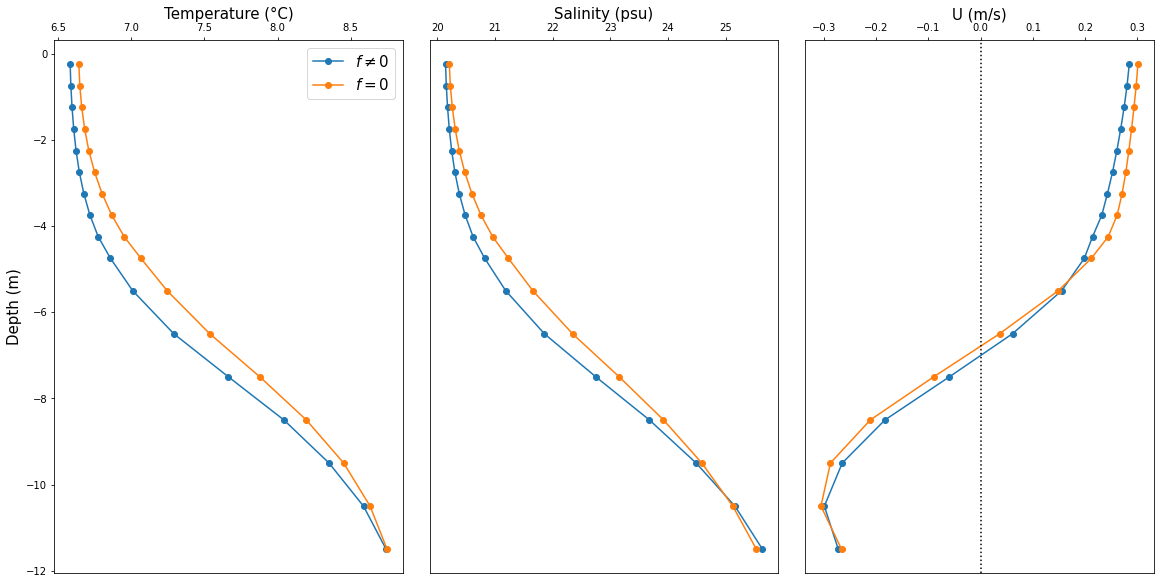

In [6]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/TSUprof/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/TSUprof/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

# Three-panel plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(16,8))
fig.tight_layout()

# Temperature
ax1.plot(pt_tmean1,depth,'o-', label=r'$f\neq0$')
ax1.plot(pt_tmean2,depth,'o-', label=r'$f=0$')
ax1.legend(fontsize=15)
ax1.set_ylabel('Depth (m)',size = 15)
#ax1.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax1.set_xlabel('Temperature (\N{DEGREE SIGN}C)', size = 15)
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity
ax2.plot(s_tmean1,depth,'o-', label=r'$f\neq0$')
ax2.plot(s_tmean2,depth,'o-', label=r'$f=0$')
#ax2.legend(fontsize=15)
ax2.set_xlabel('Salinity (psu)', size = 15)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.yaxis.set_visible(False) # This erases the y ticks
# Horizontal velocity
ax3.plot(u_tmean1,depth,'o-',label=r'$f\neq0$')
ax3.plot(u_tmean2,depth,'o-',label=r'$f=0$')
#ax3.legend(fontsize=15)
ax3.axvline(x=0,color='k',linestyle=':')
ax3.set_xlabel('U (m/s)', size = 15)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(False) # This erases the y ticks
#plt.close()
fig.savefig(fig_path + '/q700.png', dpi=200, bbox_inches='tight')

In [5]:
u_tmean

NameError: name 'u_tmean' is not defined